In [276]:
import requests
import pandas as pd
#import json

In [277]:
from requests import request


endpoint_ulr="https://www.allkeyshop.com/api/price_history_api.php"

params={
    'normalised_name':18688,  #= RDR2, Heavy Rain = 15509, hitman 3 = 38888
    'currency':'EUR',
    'database':'allkeyshop.com',
    'v2':1
    }

headers={
}

r=request('get',endpoint_ulr, params=params, headers=headers)

df_history=pd.json_normalize(r.json(),record_path='history')



In [278]:
rj=r.json()['officialMerchants'].split(',')

rj=[int(i) for i in rj]

In [279]:
df_rj=pd.DataFrame(rj,columns=['officialMerchants'])
df_rj

,officialMerchants
0,620621
1,273
2,2231
3,2232
4,2234
...,...
84,420
85,421
86,423
87,332


In [280]:
df_history

,product_id,merchant_id,edition,min_discount_price,start,end
0,134203749,321,21,32.39,2022-10-21 18:58:05,2022-10-24 00:54:39
1,134057982,61,21,30.88,2022-10-23 00:24:41,2022-10-24 00:12:57
2,132843846,61,1,26.27,2022-10-23 03:09:10,2022-10-24 00:12:19
3,132850332,61,21,35.24,2022-10-23 02:58:09,2022-10-24 00:12:19
4,132857670,61,1,26.83,2022-10-18 07:36:01,2022-10-24 00:12:19
...,...,...,...,...,...,...
567,132846390,701,1,59.86,2022-10-23 14:41:14,2022-10-23 14:41:14
568,132846393,701,21,87.07,2022-10-22 14:42:18,2022-10-23 14:41:14
569,133199342,69,1,29.99,2022-10-21 10:59:20,2022-10-21 10:59:20
570,133337770,69,21,89.99,2022-10-20 10:04:17,2022-10-20 10:04:17


In [281]:
to_int=['edition', 'merchant_id', 'product_id']
df_history[to_int] = df_history[to_int].apply(lambda x: x.astype('int'))

df_history['min_discount_price'] = df_history['min_discount_price'].astype('float')


df_history['start']=pd.to_datetime(df_history['start'])
df_history['start']=pd.to_datetime(df_history['start'].dt.date)
#df_history['end']=pd.to_datetime(df_history['end'],format='%Y-%m-%d')



In [282]:
df_history['start']

0     2022-10-21
1     2022-10-23
2     2022-10-23
3     2022-10-23
4     2022-10-18
         ...    
567   2022-10-23
568   2022-10-22
569   2022-10-21
570   2022-10-20
571   2022-10-12
Name: start, Length: 572, dtype: datetime64[ns]

In [283]:
df_history.sort_values(by='start',inplace=True)
df_history

,product_id,merchant_id,edition,min_discount_price,start,end
433,132892434,47,41,24.94,2022-10-11,2022-10-12 00:01:48
444,132868941,67,1,64.80,2022-10-11,2022-10-11 09:41:05
443,132844147,94,41,28.76,2022-10-11,2022-10-11 23:27:22
442,132843978,94,21,26.36,2022-10-11,2022-10-11 23:32:39
441,132850197,67,1,26.15,2022-10-11,2022-10-11 23:34:27
...,...,...,...,...,...,...
456,132892434,47,41,27.19,2022-10-24,2022-10-24 13:32:07
449,134203749,321,21,32.34,2022-10-24,2022-10-24 14:55:09
448,134485322,272,1,21.39,2022-10-24,2022-10-24 14:57:27
450,132847438,218,21,28.17,2022-10-24,2022-10-24 14:32:37


In [284]:
df_filt_off=df_history[df_history['merchant_id'].isin(rj)]
df_filt_off

,product_id,merchant_id,edition,min_discount_price,start,end
571,134402833,228,21,89.99,2022-10-12,2022-10-17 01:43:00
471,132883009,310,21,89.99,2022-10-12,2022-10-24 06:19:38
472,132848341,310,1,59.99,2022-10-12,2022-10-24 06:19:37
563,132846400,700,1,56.99,2022-10-13,2022-10-24 00:01:00
565,132846401,7,21,85.49,2022-10-13,2022-10-24 00:00:43
566,132846403,700,21,85.49,2022-10-13,2022-10-24 00:00:25
479,132852653,270,1,53.99,2022-10-13,2022-10-24 01:58:55
477,134671977,2,1,59.99,2022-10-13,2022-10-24 02:26:03
508,132846411,81,1,47.39,2022-10-13,2022-10-24 00:23:11
545,132846394,7,1,56.99,2022-10-13,2022-10-24 00:03:20


In [285]:
df_filt_key=df_history[~df_history['merchant_id'].isin(rj)]
df_filt_key['start']=df_filt_key['start'].dt.date
df_filt_key['start']=pd.to_datetime(df_filt_key['start'])
df_filt_key['start']

C:\Users\robbo\AppData\Local\Temp\ipykernel_15084\40808845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_key['start']=df_filt_key['start'].dt.date
C:\Users\robbo\AppData\Local\Temp\ipykernel_15084\40808845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_key['start']=pd.to_datetime(df_filt_key['start'])


433   2022-10-11
444   2022-10-11
443   2022-10-11
442   2022-10-11
441   2022-10-11
         ...    
456   2022-10-24
449   2022-10-24
448   2022-10-24
450   2022-10-24
458   2022-10-24
Name: start, Length: 532, dtype: datetime64[ns]

In [286]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

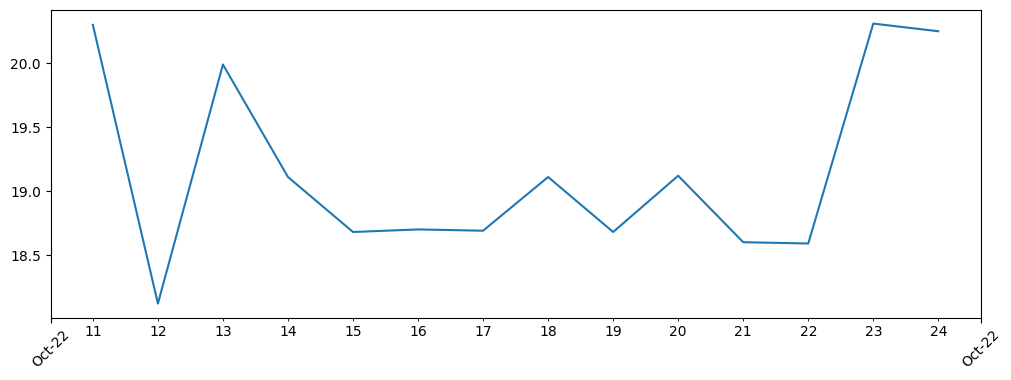

In [287]:

fig, axs = plt.subplots(figsize=(12,4))


#.value.plot(kind=bar, rot=0, ax=axs)

mm=df_history.groupby(df_history['start'].dt.date)['min_discount_price'].min()
#mm.plot(kind='bar', rot=0, ax=axs)
axs.plot(mm.index,mm.values)


axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_minor_locator(mdates.DayLocator())

axs.xaxis.set_minor_formatter(
    mdates.ConciseDateFormatter(axs.xaxis.get_minor_locator()))

#axs.xaxis.set_major_formatter(
#    mdates.ConciseDateFormatter(axs.xaxis.get_major_locator()))

axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
axs.xaxis.set_tick_params(rotation=45)

#or label in axs.get_xticklabels(which='major'):
#    label.set(rotation=30, horizontalalignment='right')

#axs.xaxis.set_major_formatter(xtick_formatter)



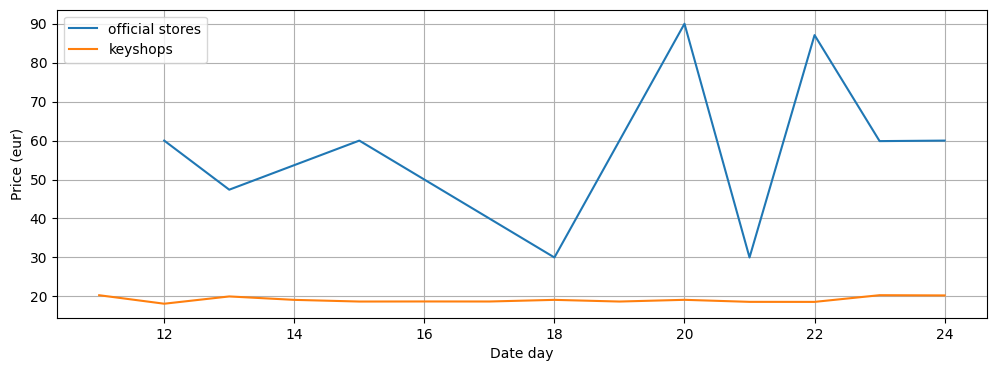

In [288]:

fig,ax=plt.subplots(figsize=(12,4))
#plt.style.use('_mpl-gallery')

df_plotto=df_filt_off.groupby(df_filt_off['start'].dt.day)['min_discount_price'].min()
#ax.plot(df_filt_off['start'].dt.day,df_filt_off['min_discount_price'].min(),linewidth=1.0)
ax=df_plotto.plot(kind='line',x='start',y='min_discount_price', label="official stores")

df_plotto_key=df_filt_key.groupby(df_filt_key['start'].dt.day)['min_discount_price'].min()
df_plotto_key.plot(ax=ax,kind='line',x='start',y='min_discount_price', label="keyshops")
plt.legend(loc='upper left')
ax.set_xlabel('Date day')
ax.set_ylabel('Price (eur)')

ax.grid(True)


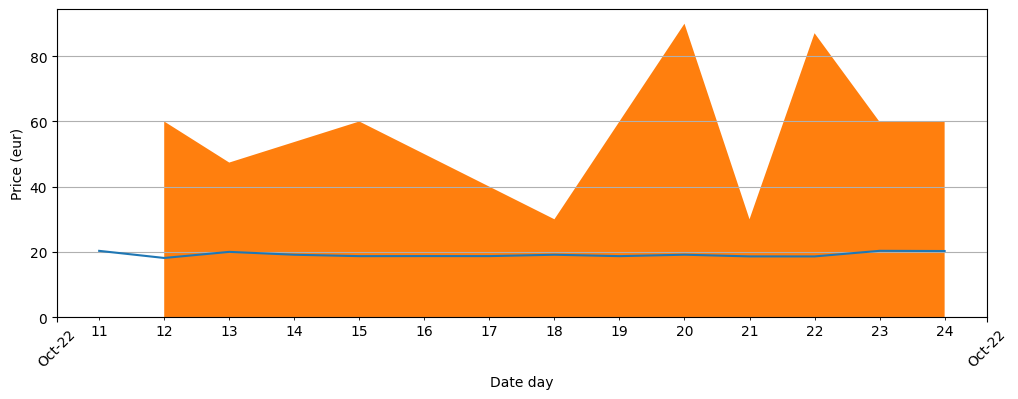

In [289]:

fig,ax=plt.subplots(figsize=(12,4))
#plt.style.use('_mpl-gallery')

df_plotto2=df_filt_key.groupby(df_filt_key['start'].dt.date)['min_discount_price'].min()
#ax.plot(df_filt_off['start'].dt.day,df_filt_off['min_discount_price'].min(),linewidth=1.0)
plt.plot(df_plotto2.index,df_plotto2.values)

series_off=df_filt_off.groupby(df_filt_off['start'].dt.date)['min_discount_price'].min()
plt.stackplot(series_off.index,series_off.values)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())

ax.xaxis.set_minor_formatter(
    mdates.ConciseDateFormatter(axs.xaxis.get_minor_locator()))

#axs.xaxis.set_major_formatter(
#    mdates.ConciseDateFormatter(axs.xaxis.get_major_locator()))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.xaxis.set_tick_params(rotation=45)

#plt.legend(loc='upper left')
ax.set_xlabel('Date day')
ax.set_ylabel('Price (eur)')

ax.grid(True)

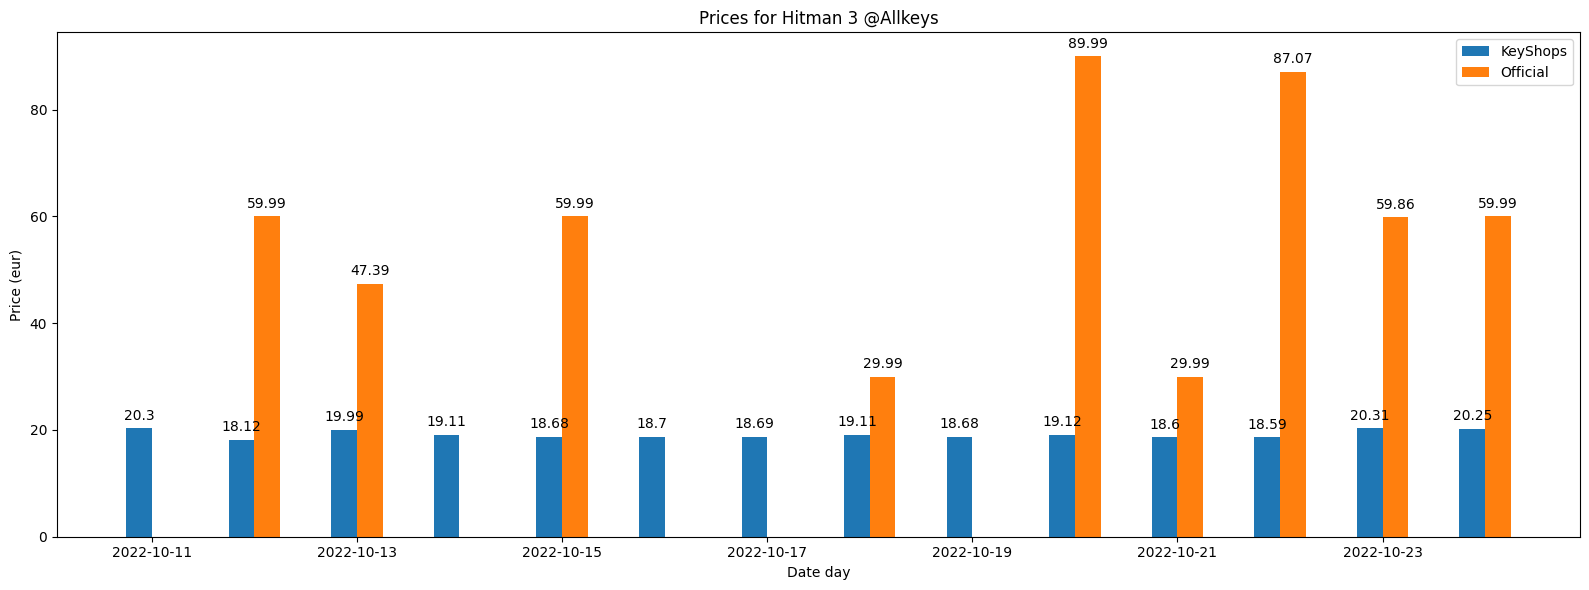

In [290]:


fig,ax=plt.subplots(figsize=(16,6))

width=0.25

df_plotto2=df_filt_key.groupby(df_filt_key['start'].dt.date)['min_discount_price'].min()
rects1 = ax.bar(df_plotto2.index,df_plotto2.values, -width,label='KeyShops',align='edge')

series_off=df_filt_off.groupby(df_filt_off['start'].dt.date)['min_discount_price'].min()
rects2 = ax.bar(series_off.index,series_off.values, width,label='Official',align='edge')

ax.set_title('Prices for Hitman 3 @Allkeys')

plt.legend(loc='upper right')
ax.set_xlabel('Date day')
ax.set_ylabel('Price (eur)')

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)

fig.tight_layout()

